<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [131]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
iowa = pd.read_csv('~/Desktop/ECON628-01-rjmaller/datasets/iowa_liquor/Iowa_liquor_sales_sample_10pct.csv')  
#
#
#
## Code Written by Jeremiah Maller
## 3-20-17
## Machine Learning for Python
#
#

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [5]:
# View index
index = list(iowa)
print index
## Print the first 3 rows in your dataframe, describe variable types, view index of data frame, view descriptive statistics, 
iowa.head(3)
# View descriptive statistics of all variables
iowa.describe()
# view variable types 
iowa.info()

['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County', 'Category', 'Category Name', 'Vendor Number', 'Item Number', 'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'Month', 'Year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [17]:
# View Data Frame
iowa.head(5)
# Counting cells with missing values
print "The number of cells with missing values is ", sum(iowa.isnull().values.ravel())
# Counting rows that have missijng values somewhere
print "The number of rows with missing values is ", sum([True for idx, row in iowa.iterrows() if any(row.isnull())])
iowa.isnull().sum()
# The Date data needs to be converted - We Need to pull year and date into separate columns
#The price data has $ which need to be removed
# The column names have spaces in them - We rename them and replaces spaces with _underscore below

,Date,store_num,city,zip_code,county_number,county,category,category_name,vendor_num,item_num,item_des,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_liters,vol_sold_gallons,month,year
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34,2,2016


### 3.2 Clean the columns

In [18]:
# Converting Date to a Format We can Use - Separate Year and Month
iowa['Date'] = pd.to_datetime(iowa['Date'])
iowa['Month'] = iowa['Date'].dt.month
iowa['Year']=iowa['Date'].dt.year
# Rename variables (rename columns)
iowa.columns = ['Date', 'store_num', 'city', 'zip_code', 'county_number', 'county', 'category', 'category_name', 'vendor_num', 'item_num', 'item_des', 'bottle_vol_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'vol_sold_liters', 'vol_sold_gallons', 'month', 'year']
iowa.head(3)

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [ ]:
#Remove $ from price data and convert objects to integers
iowa['state_bottle_cost'] = iowa['state_bottle_cost'].str.replace('$','')
iowa.state_bottle_cost = iowa.state_bottle_cost.convert_objects(convert_numeric=True)
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].str.replace('$','')
iowa.state_bottle_retail = iowa.state_bottle_retail.convert_objects(convert_numeric=True)
iowa['sale_dollars'] = iowa['sale_dollars'].str.replace('$','')
iowa.sale_dollars = iowa.sale_dollars.convert_objects(convert_numeric=True)

#Remove Outliers - Could Use if Wanted To
#def reject_outliers(data, m=6):
#    return data[abs(data - np.mean(data)) < m * np.std(data)]


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [266]:
# The Table below investigates the problem stores which are not open for the full 2015 year
iowa2015 = iowa[(iowa.year == 2015)]
month_count = [('Min', np.amin), ('Max', np.amax)]
iowa2015_m = iowa2015.groupby(['store_num'])[['month']].agg(month_count).reset_index()
iowa2015_m
# We clean the data by removing those problem store observations from the data set
# iowa2015only = iowa2015filt[(iowa2015filt.Min == 1) & (iowa2015filt.Max== 12)]
# iowaf2015 = iowa[(iowa.year == 2015) & (iowa.month >= 1) & (iowa.month <= 12)]
# iowaf2015 = iowa[(iowa.year == 2015) & (iowa.month >= 1) & (iowa.month <= 12)]
# This gives us correct yearly statistics for the stores that remain in our data set


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [267]:
# Yearly liquor sales for each store in Iowa in 2015
# Groupby store number and sum sales per store
grouped_yls = iowa2015.groupby(['store_num']).sum()[['sale_dollars']].reset_index()
# Sort in descending order by annual sales
grouped_yls.sort(['sale_dollars'], ascending=0, inplace=True)
print grouped_yls


      store_num  sale_dollars
125        2633    1000783.30
1032       4829     878812.70
194        3385     441983.55
36         2512     419746.83
200        3420     352020.66
389        3952     333311.98
323        3814     247417.42
193        3354     240365.94
306        3773     232460.41
153        2670     227442.71
92         2593     191333.88
204        3447     187650.04
1269       5102     184582.16
123        2629     184574.96
119        2625     182118.58
216        3524     180805.62
147        2663     175203.29
327        3820     172792.22
499        4167     167173.55
134        2648     158668.94
69         2561     157134.87
111        2616     154160.15
893        4677     151507.66
30         2502     150094.01
28         2500     149121.63
0          2106     146326.22
591        4312     145363.04
29         2501     144833.66
113        2619     143958.96
32         2506     143431.66
110        2614     142675.29
212        3494     140733.54
195       

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 5.2 Calculate the profit each store is making in 2015.


In [268]:
#iowa2015 = iowa[(iowa.year == 2015)] 
iowa2015['total_cost'] = iowa2015['bottles_sold']*iowa2015['state_bottle_cost']
iowa2015['profit'] = iowa2015['sale_dollars']-iowa2015['total_cost']
iowa2015['profit']

# Annual Profitfor each store in Iowa in 2015
# Groupby store number and sum profit per store
grouped_yls = iowa2015.groupby(['store_num']).sum()[['profit']].reset_index()
# Sort in descending order by annual profit
grouped_yls.sort(['profit'], ascending=0, inplace=True)
print grouped_yls

      store_num     profit
125        2633  333816.91
1032       4829  293196.99
194        3385  147884.62
36         2512  140143.46
200        3420  117593.34
389        3952  111230.21
323        3814   83004.48
193        3354   80244.69
306        3773   77525.08
153        2670   75945.64
92         2593   64197.45
204        3447   62683.22
123        2629   61636.70
1269       5102   61588.64
119        2625   60794.18
216        3524   60528.54
147        2663   58512.28
327        3820   57650.18
499        4167   55756.18
134        2648   52950.63
69         2561   52844.61
111        2616   51472.43
893        4677   50542.89
30         2502   50345.31
28         2500   49801.48
0          2106   48838.08
591        4312   48493.09
29         2501   48430.73
113        2619   48105.29
32         2506   47925.66
110        2614   47695.76
212        3494   47047.86
195        3390   44977.35
101        2603   44393.80
209        3477   43224.00
1307       5144   43037.06
1

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [275]:
# Calculate Profit Per Gallon for each row
iowa2015['profit_pg'] = iowa2015['profit']/iowa2015['vol_sold_gallons']
#iowa2015['profit_pg'] 
# Groupby county and take mean to calculate profit per gallon by county
grouped_ppg = iowa2015.groupby(['county']).mean()[['profit_pg']].reset_index()
grouped_ppg.sort(['profit_pg'], ascending=0, inplace=True)
print grouped_ppg
# grouped code inspired by: http://pandas.pydata.org/pandas-docs/stable/groupby.html
#profit_pg_sorted = iowa2015.sort(['profit_pg'], ascending=[False])
#*ppg_by_county
#http://stackoverflow.com/questions/24988873/python-sort-descending-dataframe-with-pandas


           county  profit_pg
76           Polk  24.778704
51        Johnson  24.412501
50      Jefferson  24.142467
81          Scott  24.134635
10    Buena Vista  23.707271
28     Des Moines  23.583735
84          Story  23.578994
91     Washington  23.546474
6      Black Hawk  23.526377
56           Linn  23.469325
96       Woodbury  23.306892
55            Lee  22.976721
68     Montgomery  22.920087
24         Dallas  22.731052
69      Muscatine  22.555584
43          Henry  22.356370
93        Webster  22.319061
29      Dickinson  22.316186
61        Mahaska  22.280549
74       Plymouth  22.235063
30        Dubuque  22.223064
77  Pottawattamie  22.206412
36         Greene  22.172351
78      Poweshiek  22.151369
22        Clinton  22.034767
89        Wapello  21.963780
1           Adams  21.894377
31          Emmet  21.862665
16    Cerro Gordo  21.832916
63       Marshall  21.797929
14           Cass  21.790330
60        Madison  21.668877
62         Marion  21.593925
54        Koss

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

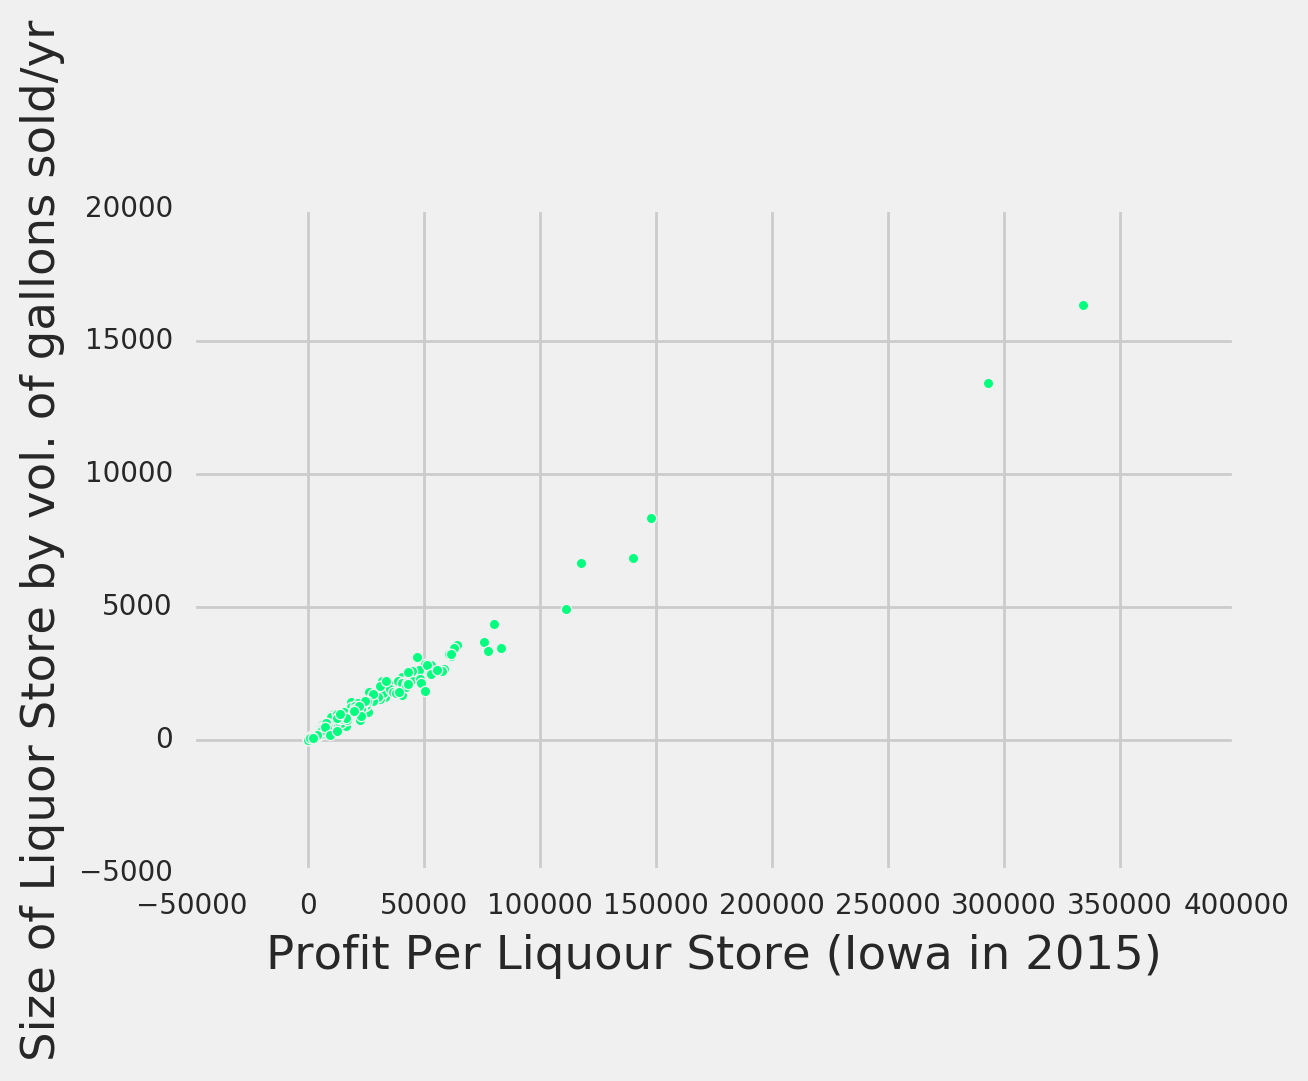

In [276]:
#calculate profit per liquor store in 2015 in Iowa
pps2015 = iowa2015.groupby(['store_num'])[['profit']].sum()
pps2015
#calculate store size by gallons sold in 2015 in Iowa
store_size = iowa2015.groupby(['store_num'])[['vol_sold_gallons']].sum()
fig = plt.figure(figsize=(6,4))
plt.scatter(pps2015, store_size, s=14, c='springgreen', marker='o')
plt.xlabel("Profit Per Liquour Store (Iowa in 2015)")
plt.ylabel("Size of Liquor Store by vol. of gallons sold/yr")
plt.show()
#sns.regplot(x=pps2015, y=store_size, marker = "+", color='aquamarine')
#scatterplot code inspired by: 1.3 Full Analysis Lab by Mario Javier Carillo 
#https://github.com/jrcmalunay/ECON628-01/blob/master/lectures/feb_13_2017/1.3-full-analysis.ipynb
# Profit increases as store size increases. Profit appears to consistently increase at a constant rate with store size
# Even very large liquor stores fit this trend line


### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [221]:
# Merging dataframes back into one single dataframe for all data from 2015 and 2016
iowa1516 = iowa2015.append(iowa2016) 
#iowa.category_name.unique()
# Creating a new column with just ten broader categories for liquor type (liq_type = Liquor Type)  
iowa1516['liq_type'] = np.where(iowa1516['category_name'].str.contains('BRANDIES') , "brandy",
           np.where(iowa1516['category_name'].str.contains('WHISK'), "whiskey",
           np.where(iowa1516['category_name'].str.contains('CRE'), "cream liq",
           np.where(iowa1516['category_name'].str.contains('AMARETTO'), "amaretto",
           np.where(iowa1516['category_name'].str.contains('SCHNAPPS'), "schnapps",  
           np.where(iowa1516['category_name'].str.contains('SCOTCH'), "scotch",
           np.where(iowa1516['category_name'].str.contains('GIN'), "gin",
           np.where(iowa1516['category_name'].str.contains('VODKA'), "vodka",
           np.where(iowa1516['category_name'].str.contains('RUM'), "rum", "other" )))))))))
iowa1516.groupby(['liq_type']).count()['category'].reset_index()

### 5.6 Do relationships exist between the broader liquor type and profit?

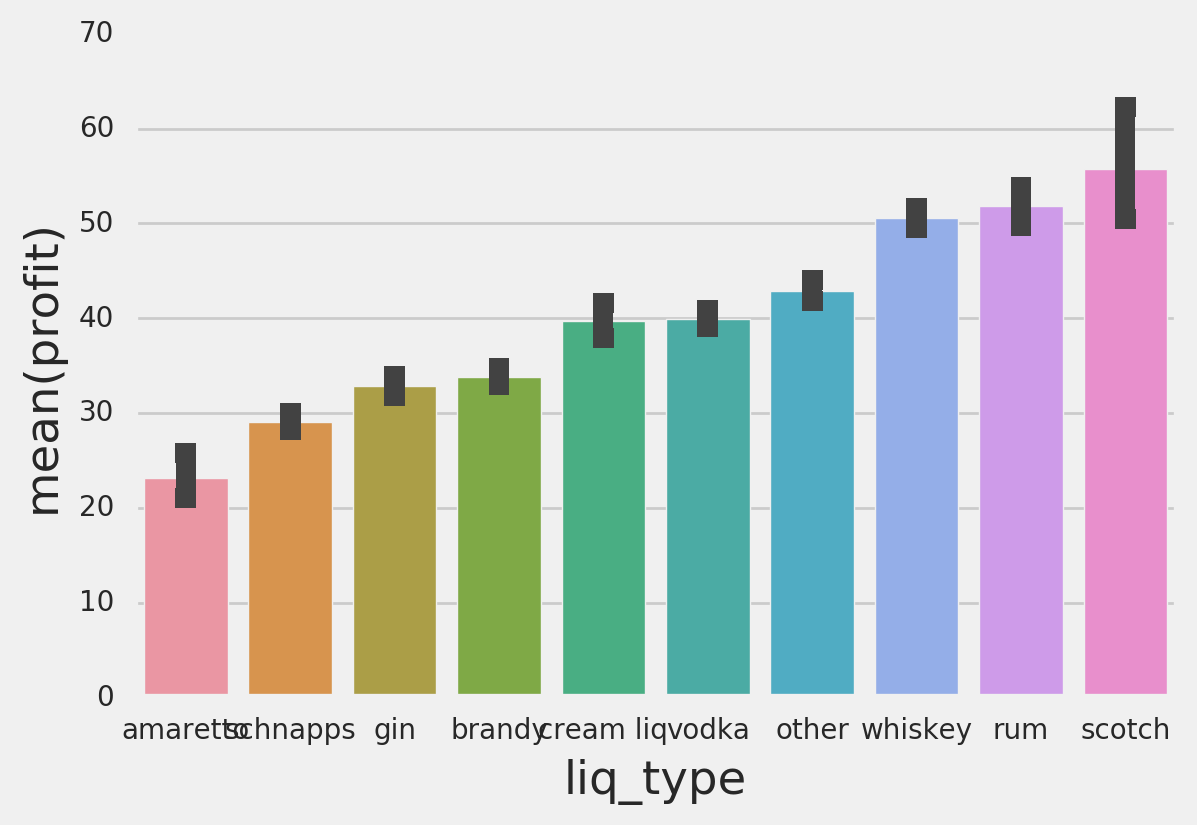

In [128]:
# Graphing the relationship between liquor type and profit
sns.barplot(x="liq_type", y="profit", data=iowa1516, capsize = .2, order=["amaretto", "schnapps", "gin", "brandy", "cream liq", "vodka", "other", "whiskey", "rum", "scotch"])
# Code inspired by: http://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
# Yes, we see a large and statistically significant difference in profit among various types of liquor
# For example, Amaretto is a low-profit category and Scotch is a very high profit category


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [136]:
# Calcualte and sort average sales by brand
asbb = iowa1516.groupby(['item_des']).mean()[['sale_dollars']].reset_index()
asbb.sort(['sale_dollars'], ascending=0, inplace=True)
print asbb
# Calculate and sort average profit by brand
apbb = iowa1516.groupby(['item_des']).mean()[['profit']].reset_index()
apbb.sort(['profit'], ascending=0, inplace=True)
print apbb
# Yes, some brands have average sales and average profit much higher than other brands
# This is a sorted descending ilst of average sales by brand
# Below it is a sorted descending list of average profit by brand

                                               item_des  sale_dollars
468        Cedar Ridge Single Malt Single Barrel Select  14602.500000
1340                                Member's Mark Vodka   4668.060000
1112                       Jim Beam Operation Homefront   4252.114286
1339                           Member's Mark Spiced Rum   3913.920000
1338                                        Medea Vodka   3221.640000
69                                Absolut w/Ginger Beer   2399.200000
1277                                 Macallan FO 17year   2163.960000
604                                  Crystal Malt 200ml   1721.160000
1269                                 Luxardo Maraschino   1260.000000
1462                            Paradise Island Bay Rum   1140.425000
104                                  Appleton Estate Vx   1071.000000
1314                             Martell Cordon Bleu 12   1048.200000
917                            Gran Centenario Reposado   1010.640000
1541                

/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/jmaller/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [265]:
# Calculate Mean Value of Gallons Sold per Store
grouped_vps = iowa1516.groupby(['store_num']).sum()[['vol_sold_gallons']]
#grouped_vps.median() 
#median gallons sold = 165.365
grouped_small = grouped_vps[(grouped_vps.vol_sold_gallons < 165.365)]
grouped_large = grouped_vps[(grouped_vps.vol_sold_gallons > 165.365)]
grouped_small.__delitem__('vol_sold_gallons')
grouped_large.__delitem__('vol_sold_gallons')
iowa1516_small = iowa1516[(iowa1516.store_num in grouped_small.store_num)]
iowa1516_large = iowa1516[(iowa1516.store_num in grouped_large.store_num)]
# Create a bar chart of liquor sales (sale_dollars) by category for stores above vs. below median size
# Graphing the relationship between liquor type and profit for SMALL STORES
sns.barplot(x="liq_type", y="profit", data=iowa1516_small, capsize = .2, order=["amaretto", "schnapps", "gin", "brandy", "cream liq", "vodka", "other", "whiskey", "rum", "scotch"])
# Graphing the relationship between liquor type and profit FOR LARGE STORES
sns.barplot(x="liq_type", y="profit", data=iowa1516_large, capsize = .2, order=["amaretto", "schnapps", "gin", "brandy", "cream liq", "vodka", "other", "whiskey", "rum", "scotch"])
#Then we impose a greater tax on the category of liquor sold the most in larger stores
#iowa1516.groupby(['liq_type']).count()['category'].reset_index()
# For example, if most profit at small stores is generated by sales of moonshine
# And most profit at large stores is generated by Scotch
# We would tax Scotch at a higher rate
# And tax Moonshine at a lower rate
# To make sure that Small Stores are not hurt too much by the tax

KeyError: 2

In [263]:
iowa1516

,Date,store_num,city,zip_code,county_number,county,category,category_name,vendor_num,item_num,...,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_liters,vol_sold_gallons,month,year,total_cost,profit,liq_type
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.00,2.38,11,2015,54.00,27.00,brandy
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,10.80,12,129.60,21.00,5.55,8,2015,86.40,43.20,vodka
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,19.98,6,119.88,10.50,2.77,4,2015,79.92,39.96,gin
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,9.99,3,29.97,2.25,0.59,8,2015,19.98,9.99,brandy
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,23.63,2,47.26,3.50,0.92,6,2015,31.50,15.76,whiskey
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,11.43,2,22.86,2.00,0.53,11,2015,15.24,7.62,schnapps
10,2015-09-28,2648,WEST DES MOINES,50265,77.0,Polk,1011250.0,SINGLE BARREL BOURBON WHISKIES,65,19235,...,39.36,6,236.16,4.50,1.19,9,2015,157.44,78.72,whiskey
11,2015-10-28,2600,OSKALOOSA,52577,62.0,Mahaska,1071100.0,AMERICAN COCKTAILS,55,57148,...,9.25,6,55.50,10.50,2.77,10,2015,36.00,19.50,other
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,...,13.38,1,13.38,1.75,0.46,1,2015,8.92,4.46,whiskey
15,2015-06-10,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,4,27.00,3.00,0.79,6,2015,18.00,9.00,brandy



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [227]:
# Create dataframes with observesionsfor only Q1 2015 and Q1 2016 respectively
iowa15Q1 = iowa2015[(iowa2015.month < 4)] 
iowa16Q1 = iowa2016[(iowa2016.month < 4)]
#iowa15Q1
#iowa16Q1
# Group new dataframes by county and find sum of sales by county
Q115 = iowa15Q1.groupby(['county']).sum()[['sale_dollars']].reset_index()
Q115.columns = ['county', 'Q115_sales']
Q116 = iowa16Q1.groupby(['county']).sum()[['sale_dollars']].reset_index()
Q116.columns = ['county', 'Q116_sales']
#print Q115
#print Q116
# Merging dataframes
# Code inspired by: http://stackoverflow.com/questions/23787072/python-pandas-join-dataframes-on-index
Q1_merged = Q115.join(Q116.set_index(['county']), on = ['county'], how = 'outer', lsuffix='_x')
Q1_merged['Q1_sales_growth'] = (Q1_merged.Q116_sales - Q1_merged.Q115_sales)/ Q1_merged.Q115_sales
Q1_merged

,county,Q115_sales,Q116_sales,Q1_sales_growth
0,Adair,10222.00,11834.16,0.157715
1,Adams,2253.60,2196.57,-0.025306
2,Allamakee,14907.98,19106.29,0.281615
3,Appanoose,15228.09,21493.52,0.411439
4,Audubon,5510.75,3226.28,-0.414548
5,Benton,14862.27,14729.42,-0.008939
6,Black Hawk,340867.08,353707.78,0.037671
7,Boone,46205.87,37744.56,-0.183122
8,Bremer,40816.54,37546.82,-0.080108
9,Buchanan,29918.32,23329.81,-0.220217


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [182]:
# Create weighted metric that shows good sales + growth
Q1_merged['weighted_metric'] = .99999*Q1_merged.Q1_sales_growth + .00001*Q1_merged.Q116_sales
# Filter Out Low Growth Counties
Q1_merged_filtered = Q1_merged[Q1_merged['Q1_sales_growth'] > .15] 
print Q1_merged_filtered.sort_values(by='weighted_metric', ascending = False)

        county  Q115_sales  Q116_sales  Q1_sales_growth  weighted_metric
51     Johnson   322143.10   371388.76         0.152869         3.866755
24      Dallas   104911.32   125159.91         0.193007         1.444604
32     Fayette    20536.94    37743.63         0.837841         1.215269
15       Cedar     9921.67    19886.09         1.004309         1.203160
55         Lee    82436.47    99432.28         0.206169         1.200489
23    Crawford    21061.60    37830.13         0.796166         1.174459
97       Worth     6046.25    11807.91         0.952931         1.071001
11      Butler     4694.47     8583.26         0.828377         0.914201
46         Ida     8080.16    13303.26         0.646410         0.779437
83       Sioux    29256.00    38970.03         0.332035         0.721732
14        Cass    20777.44    28105.27         0.352682         0.633731
3    Appanoose    15228.09    21493.52         0.411439         0.626370
62      Marion    38527.89    45029.24         0.16

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
# I recommend Johnson county because it ranks the highest by my weighted and filtered metric  
# Based on Q1 2016 sales ($371,388) and it's growth rate over the past year was strong, 15.3%
# Current sales are strong ($371388) and the growth rate over the past year is strong.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [219]:
# Whiskey is the most popular and profitable liquor type in our dataset - see #5.6
# Filter iowa15Q1 iowa16Q1 dataframes for whiskey sales only
iowa1516_f = iowa1516[iowa1516['liq_type'] == 'whiskey'] 
# Create dataframes with observesionsfor only Q1 2015 and Q1 2016 respectively
iowa15Q1_fw = iowa1516_f[(iowa1516_f.month < 4) & (iowa1516_f.year == 2015)] 
iowa16Q1_fw = iowa1516_f[(iowa1516_f.month < 4) & (iowa1516_f.year == 2016)]
# Group new dataframes by county and find sum of sales by county
Q115_fw = iowa15Q1_fw.groupby(['county']).sum()[['sale_dollars']].reset_index()
Q115_fw.columns = ['county', 'Q115_whiskey_sales']
Q116_fw = iowa16Q1_fw.groupby(['county']).sum()[['sale_dollars']].reset_index()
Q116_fw.columns = ['county', 'Q116_whiskey_sales']
# Merging dataframes
# code inspired by: http://stackoverflow.com/questions/23787072/python-pandas-join-dataframes-on-index
#Q1_merged_fs = Q115_fs.join(Q116_fs.set_index(['county']), on = ['county'], how = 'outer', lsuffix='_x')
Q1_merged_fw = pd.merge(Q115_fw, Q116_fw, on ='county', how = 'right')
Q1_merged_fw['Q1_whsk_sale_growth'] = (Q1_merged_fw.Q116_whiskey_sales - Q1_merged_fw.Q115_whiskey_sales)/ Q1_merged_fw.Q115_whiskey_sales
#print Q1_merged_fw.sort_values(by='Q1_whsk_sale_growth', ascending = False)
# Create weighted metric that shows good whiskey sales + growth in sales
Q1_merged_fw['weighted_metric'] = .9999*Q1_merged_fw.Q1_whsk_sale_growth + .0001*Q1_merged_fw.Q116_whiskey_sales
#Filter Out Low Growth Counties
Q1_merged_filtered_fw = Q1_merged_fw[Q1_merged_fw['Q1_whsk_sale_growth'] > .15] 
print Q1_merged_filtered_fw.sort_values(by='weighted_metric', ascending = False)

           county  Q115_whiskey_sales  Q116_whiskey_sales  \
77  Pottawattamie           100967.78           119944.76   
96       Woodbury            69533.62           105971.56   
16    Cerro Gordo            40929.21            50516.02   
23       Crawford             8712.52            24391.34   
15          Cedar             4319.47            14450.99   
93        Webster            28490.61            34597.33   
63       Marshall            27916.21            32928.29   
22        Clinton            23807.40            31370.79   
83          Sioux            12349.82            22211.88   
11         Butler             1235.99             4141.62   
41         Hardin            12622.73            19879.43   
32        Fayette             8808.19            15720.38   
50      Jefferson             5103.38            10341.58   
10    Buena Vista            13167.00            17272.33   
27       Delaware             6115.22            11277.45   
14           Cass       

In [ ]:
# Woodbury county is an attractive site for a Whiskey store becuase Whiskey sales 
# In Woodbury county were strong ($105,971 in Q1 2016) and the growth rate of 
# Whiskey sales is very high (52.4% annual growth)